In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Experiment Setup -- Read Data

In [6]:
# first of all read all csvs from the data folder: 
# We use 2018 to train so for now only 2018 data -- no need to take a too large dataframe
df_games_2018 = pd.read_csv('./Data/games.csv')
df_games_2018 = df_games_2018[df_games_2018.SEASON == 2018]

In [8]:
df_games_2018.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
16521,2019-06-13,41800406,Final,1610612744,1610612761,2018,1610612744,110.0,0.488,0.700,...,28.0,42.0,1610612761,114.0,0.476,0.793,0.394,25.0,39.0,0
16522,2019-06-10,41800405,Final,1610612761,1610612744,2018,1610612761,105.0,0.447,0.778,...,19.0,43.0,1610612744,106.0,0.463,0.714,0.476,27.0,37.0,0
16523,2019-06-07,41800404,Final,1610612744,1610612761,2018,1610612744,92.0,0.449,0.667,...,26.0,42.0,1610612761,105.0,0.419,0.958,0.313,22.0,39.0,0
16524,2019-06-05,41800403,Final,1610612744,1610612761,2018,1610612744,109.0,0.396,0.833,...,25.0,41.0,1610612761,123.0,0.524,0.952,0.447,30.0,40.0,0
16525,2019-06-02,41800402,Final,1610612761,1610612744,2018,1610612761,104.0,0.372,0.885,...,17.0,49.0,1610612744,109.0,0.463,0.870,0.382,34.0,42.0,0


In [9]:
df_games_detail = pd.read_csv('./Data/games_details.csv')

In [11]:
df_games_detail.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,12000047,1610612766,CHA,Charlotte,1628998,Cody Martin,F,NaN,17:06,0.0,...,0.0,2.0,2.0,1.0,0.0,1.0,1.0,2.0,0.0,-31.0
1,12000047,1610612766,CHA,Charlotte,1629023,P.J. Washington,F,NaN,24:58,4.0,...,1.0,6.0,7.0,2.0,2.0,1.0,5.0,3.0,9.0,-2.0
2,12000047,1610612766,CHA,Charlotte,203469,Cody Zeller,C,NaN,22:45,5.0,...,2.0,2.0,4.0,0.0,0.0,1.0,0.0,2.0,13.0,-23.0
3,12000047,1610612766,CHA,Charlotte,1628984,Devonte' Graham,G,NaN,31:30,8.0,...,1.0,3.0,4.0,3.0,2.0,0.0,4.0,0.0,25.0,-7.0
4,12000047,1610612766,CHA,Charlotte,1626179,Terry Rozier,G,NaN,26:48,8.0,...,1.0,4.0,5.0,6.0,1.0,0.0,0.0,2.0,24.0,22.0


In [18]:
df_player_2018 = pd.read_csv('./Data/players.csv')
df_player_2018 = df_player_2018[df_player_2018.SEASON == 2018]

In [19]:
df_player_2018.head()

,PLAYER_NAME,TEAM_ID,PLAYER_ID,SEASON
626,Kawhi Leonard,1610612761,202695,2018
627,Pascal Siakam,1610612761,1627783,2018
628,Marc Gasol,1610612761,201188,2018
629,Danny Green,1610612761,201980,2018
630,Kyle Lowry,1610612761,200768,2018


In [20]:
df_ranking = pd.read_csv('./Data/ranking.csv')

In [22]:
df_ranking.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612747,0,12020,2020-12-21,West,L.A. Lakers,4,4,0,1.00,2-0,2-0,NaN
1,1610612762,0,12020,2020-12-21,West,Utah,3,3,0,1.00,2-0,1-0,NaN
2,1610612740,0,12020,2020-12-21,West,New Orleans,2,2,0,1.00,1-0,1-0,NaN
3,1610612745,0,12020,2020-12-21,West,Houston,4,3,1,0.75,2-0,1-1,NaN
4,1610612763,0,12020,2020-12-21,West,Memphis,4,3,1,0.75,1-1,2-0,NaN


In [26]:
df_team = pd.read_csv('./Data/teams.csv')

In [27]:
df_team.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,NICKNAME,YEARFOUNDED,CITY,ARENA,ARENACAPACITY,OWNER,GENERALMANAGER,HEADCOACH,DLEAGUEAFFILIATION
0,0,1610612737,1949,2019,ATL,Hawks,1949,Atlanta,State Farm Arena,18729.0,Tony Ressler,Travis Schlenk,Lloyd Pierce,Erie Bayhawks
1,0,1610612738,1946,2019,BOS,Celtics,1946,Boston,TD Garden,18624.0,Wyc Grousbeck,Danny Ainge,Brad Stevens,Maine Red Claws
2,0,1610612740,2002,2019,NOP,Pelicans,2002,New Orleans,Smoothie King Center,NaN,Tom Benson,Trajan Langdon,Alvin Gentry,No Affiliate
3,0,1610612741,1966,2019,CHI,Bulls,1966,Chicago,United Center,21711.0,Jerry Reinsdorf,Gar Forman,Jim Boylen,Windy City Bulls
4,0,1610612742,1980,2019,DAL,Mavericks,1980,Dallas,American Airlines Center,19200.0,Mark Cuban,Donnie Nelson,Rick Carlisle,Texas Legends


# General Review

In [152]:
df_games = pd.read_csv('./Data/games.csv')
df_games = df_games[(df_games.SEASON >= 2017) &(df_games.SEASON < 2020)]
#2018 Game is actually season 2017, therefore past three season from year 2018 -2020 is season 2017, 2018 and 2019
# merge with the team csv to get the team name instead of team ID: 

In [153]:
df_games = df_games.merge(df_team[["TEAM_ID","NICKNAME"]], how='left', left_on='HOME_TEAM_ID', right_on='TEAM_ID')
df_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,TEAM_ID,NICKNAME
0,2020-10-11,41900406,Final,1610612748,1610612747,2019,1610612748,93.0,0.443,0.591,...,1610612747,106.0,0.483,0.643,0.314,23.0,46.0,0,1610612748,Heat
1,2020-10-09,41900405,Final,1610612747,1610612748,2019,1610612747,108.0,0.463,0.857,...,1610612748,111.0,0.458,0.955,0.424,26.0,35.0,0,1610612747,Lakers
2,2020-10-06,41900404,Final,1610612748,1610612747,2019,1610612748,96.0,0.427,0.808,...,1610612747,102.0,0.443,0.857,0.359,25.0,42.0,0,1610612748,Heat
3,2020-10-04,41900403,Final,1610612748,1610612747,2019,1610612748,115.0,0.513,0.913,...,1610612747,104.0,0.430,0.759,0.333,23.0,43.0,1,1610612748,Heat
4,2020-10-02,41900402,Final,1610612747,1610612748,2019,1610612747,124.0,0.505,0.588,...,1610612748,114.0,0.507,0.912,0.407,29.0,37.0,1,1610612747,Lakers


In [154]:
# now rename the team name to home team name
df_games = df_games.rename(columns={"NICKNAME": "HOME_TEAM_NAME"})
df_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,TEAM_ID,HOME_TEAM_NAME
0,2020-10-11,41900406,Final,1610612748,1610612747,2019,1610612748,93.0,0.443,0.591,...,1610612747,106.0,0.483,0.643,0.314,23.0,46.0,0,1610612748,Heat
1,2020-10-09,41900405,Final,1610612747,1610612748,2019,1610612747,108.0,0.463,0.857,...,1610612748,111.0,0.458,0.955,0.424,26.0,35.0,0,1610612747,Lakers
2,2020-10-06,41900404,Final,1610612748,1610612747,2019,1610612748,96.0,0.427,0.808,...,1610612747,102.0,0.443,0.857,0.359,25.0,42.0,0,1610612748,Heat
3,2020-10-04,41900403,Final,1610612748,1610612747,2019,1610612748,115.0,0.513,0.913,...,1610612747,104.0,0.430,0.759,0.333,23.0,43.0,1,1610612748,Heat
4,2020-10-02,41900402,Final,1610612747,1610612748,2019,1610612747,124.0,0.505,0.588,...,1610612748,114.0,0.507,0.912,0.407,29.0,37.0,1,1610612747,Lakers


In [155]:
# do the same thing to the visitor team name: 
df_games = df_games.merge(df_team[["TEAM_ID","NICKNAME"]], how='left', left_on='VISITOR_TEAM_ID', right_on='TEAM_ID')
df_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,TEAM_ID_x,HOME_TEAM_NAME,TEAM_ID_y,NICKNAME
0,2020-10-11,41900406,Final,1610612748,1610612747,2019,1610612748,93.0,0.443,0.591,...,0.483,0.643,0.314,23.0,46.0,0,1610612748,Heat,1610612747,Lakers
1,2020-10-09,41900405,Final,1610612747,1610612748,2019,1610612747,108.0,0.463,0.857,...,0.458,0.955,0.424,26.0,35.0,0,1610612747,Lakers,1610612748,Heat
2,2020-10-06,41900404,Final,1610612748,1610612747,2019,1610612748,96.0,0.427,0.808,...,0.443,0.857,0.359,25.0,42.0,0,1610612748,Heat,1610612747,Lakers
3,2020-10-04,41900403,Final,1610612748,1610612747,2019,1610612748,115.0,0.513,0.913,...,0.430,0.759,0.333,23.0,43.0,1,1610612748,Heat,1610612747,Lakers
4,2020-10-02,41900402,Final,1610612747,1610612748,2019,1610612747,124.0,0.505,0.588,...,0.507,0.912,0.407,29.0,37.0,1,1610612747,Lakers,1610612748,Heat


In [156]:
df_games = df_games.rename(columns={"NICKNAME": "VISITOR_TEAM_NAME"})
df_games.head()

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS,TEAM_ID_x,HOME_TEAM_NAME,TEAM_ID_y,VISITOR_TEAM_NAME
0,2020-10-11,41900406,Final,1610612748,1610612747,2019,1610612748,93.0,0.443,0.591,...,0.483,0.643,0.314,23.0,46.0,0,1610612748,Heat,1610612747,Lakers
1,2020-10-09,41900405,Final,1610612747,1610612748,2019,1610612747,108.0,0.463,0.857,...,0.458,0.955,0.424,26.0,35.0,0,1610612747,Lakers,1610612748,Heat
2,2020-10-06,41900404,Final,1610612748,1610612747,2019,1610612748,96.0,0.427,0.808,...,0.443,0.857,0.359,25.0,42.0,0,1610612748,Heat,1610612747,Lakers
3,2020-10-04,41900403,Final,1610612748,1610612747,2019,1610612748,115.0,0.513,0.913,...,0.430,0.759,0.333,23.0,43.0,1,1610612748,Heat,1610612747,Lakers
4,2020-10-02,41900402,Final,1610612747,1610612748,2019,1610612747,124.0,0.505,0.588,...,0.507,0.912,0.407,29.0,37.0,1,1610612747,Lakers,1610612748,Heat


In [ ]:
# As of now we have a game data that conatins each game general info and team name of from 2018 to 2020
# df_games            ## checked how many rows in total --> 4001
# df_games.dropna()   ## checked if there is any NA --> NO

In [ ]:
import plotly
import plotly.express as px
import plotly.io as pio

In [157]:
# Let's foucs on the data when home team wins (home team win = 1) and guest team wins (home team win = 0)
home_game_win = df_games[df_games.HOME_TEAM_WINS == 1]
home_game_win = home_game_win.groupby(['HOME_TEAM_NAME','SEASON'],as_index=False)[['PTS_home']].sum()
print(home_game_win.head())

  HOME_TEAM_NAME  SEASON  PTS_home
0          76ers    2017    3902.0
1          76ers    2018    4320.0
2          76ers    2019    3734.0
3          Bucks    2017    3143.0
4          Bucks    2018    4996.0


In [92]:
home_game_bar = px.bar(
    data_frame=home_game_win,
    x="PTS_home",
    y="HOME_TEAM_NAME",
    color="SEASON", 
    opacity=0.9,
    orientation="h",
    barmode='group',
    labels={"HOME_TEAM_NAME":"Teams","PTS_home":"Number of points scored","SEASON":"Season"},
    title='NBA Season 2017-2019 Home Teams Total Scores',
#     width=1400, 
#     height=720,
    template='plotly_white',
)
home_game_bar.update_yaxes(tickmode = 'linear')
pio.show(home_game_bar)

In [87]:
# Now foucs on the data when guest team wins (home team win = 0)
guest_game_win = df_games[df_games.HOME_TEAM_WINS == 0]
guest_game_win = guest_game_win.groupby(['VISITOR_TEAM_NAME','SEASON'],as_index=False)[['PTS_away']].sum()

In [91]:
guest_game_bar = px.bar(
    data_frame=guest_game_win,
    x="PTS_away",
    y="VISITOR_TEAM_NAME",
    color="SEASON", 
    opacity=0.9,
    orientation="h",
    barmode='group',
    labels={"VISITOR_TEAM_NAME":"Teams","PTS_away":"Number of points scored","SEASON":"Season"},
    title='NBA Season 2017-2019 Guest/Visitor Teams Total Scores',
#     width=1400, 
#     height=720,
    template='plotly_white',
)
guest_game_bar.update_yaxes(tickmode = 'linear')
pio.show(guest_game_bar)

In [ ]:
# Above two graps --> clearly a team gets more points at home game than visitor game (in general)

In [158]:
# Overall on average, what is affecting a winning game among all teams(Home)? 
home_game_win2 = df_games[df_games.HOME_TEAM_WINS == 1]
home_game_win2 = home_game_win2.groupby(['HOME_TEAM_WINS','SEASON'],as_index=False)[['FG_PCT_home','FT_PCT_home','FG3_PCT_home','PTS_home']].mean()

guest_game_win2 = df_games[df_games.HOME_TEAM_WINS == 0]
guest_game_win2 = guest_game_win2.groupby(['HOME_TEAM_WINS','SEASON'],as_index=False)[['FG_PCT_away','FT_PCT_away','FG3_PCT_away','PTS_away']].mean()


print(home_game_win2)
print(guest_game_win2)

   HOME_TEAM_WINS  SEASON  FG_PCT_home  FT_PCT_home  FG3_PCT_home    PTS_home
0               1    2017     0.485863     0.774636      0.385666  111.732919
1               1    2018     0.483659     0.778060      0.383980  117.254321
2               1    2019     0.486883     0.778623      0.386237  117.698198
   HOME_TEAM_WINS  SEASON  FG_PCT_away  FT_PCT_away  FG3_PCT_away    PTS_away
0               0    2017     0.481792     0.780496      0.392709  111.741768
1               0    2018     0.482104     0.780072      0.384204  116.188380
2               0    2019     0.481523     0.782350      0.384035  116.513043


PTS_home --> Number of points scored by home team <br>
FG_PCT_home --> Field Goal Percentage home team <br>
FT_PCT_home	--> Free Throw Percentage of the home team <br>
FG3_PCT_home --> Three Point Percentageof the home team <br>
AST_home --> Assists of the home team <br>
REB_home --> Rebounds of the home team <br>

In [ ]:
# As you can see above, the average of all teams score ratio has been incrediblely consistant when the team won the game
# For a visitor winning team, the average of Free throw score rate is higher than the home team. 

In [97]:
import seaborn as sns

In [99]:
df_games_corr = df_games

In [100]:
# drop all visitor team data: 
for col in df_games_corr.columns: 
    if 'away' in col: 
        del df_games_corr[col]

In [103]:
# Remove all columns between column name 'GAME_DATE_EST' to 'TEAM_ID_home' 
df_games_corr = df_games_corr.drop(df_games_corr.loc[:, 'GAME_DATE_EST':'TEAM_ID_home'].columns, axis = 1)

In [105]:
# Remove all columns between column name 'TEAM_ID_x' to 'VISITOR_TEAM_NAME' 
df_games_corr = df_games_corr.drop(df_games_corr.loc[:, 'TEAM_ID_x':'VISITOR_TEAM_NAME'].columns, axis = 1)

In [107]:
# Compute the correlation matrix
corr = df_games_corr.corr()

<AxesSubplot:>

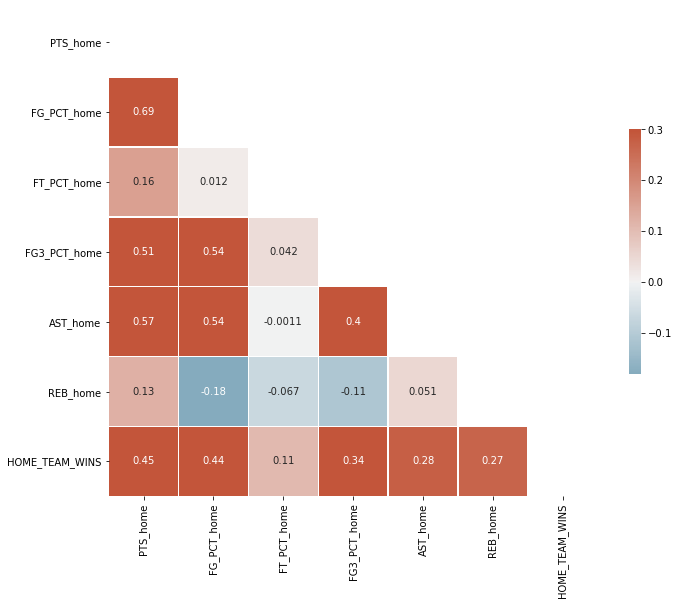

In [110]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})

PTS_home --> Number of points scored by home team <br>
FG_PCT_home --> Field Goal Percentage home team <br>
FT_PCT_home	--> Free Throw Percentage of the home team <br>
FG3_PCT_home --> Three Point Percentageof the home team <br>
AST_home --> Assists of the home team <br>
REB_home --> Rebounds of the home team <br>

# Classification test: 

In [114]:
# Assign X (data) and y (target)
X = df_games_corr.drop("HOME_TEAM_WINS", axis=1)
y = df_games_corr["HOME_TEAM_WINS"]
print(X.shape, y.shape)

(4001, 6) (4001,)


In [115]:
# Split our data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [126]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=2000)
classifier

LogisticRegression(max_iter=2000)

In [127]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [128]:
#Validate the model using the test data
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.773
Testing Data Score: 0.7702297702297702


In [132]:
# Make predictions
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 1 0 1 1 0 0 0 1]
First 10 Actual labels: [0, 1, 0, 1, 1, 1, 0, 0, 0, 1]


In [134]:
df_class = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
df_class.head()

,Prediction,Actual
0,0,0
1,0,1
2,1,0
3,0,1
4,1,1


In [137]:
df_class["Prediction"].sum()

612

In [138]:
df_class["Actual"].sum()

594

Classification is helping only if we already have the data -- for example, if we want to predict if a team can win at the half time, based on the first half of the game performance. 
Since basketball is all about the team work, so let's do a multi linear regression and put all score factors in.

PTS_home --> Number of points scored by home team <br>
FG_PCT_home --> Field Goal Percentage home team <br>
FT_PCT_home	--> Free Throw Percentage of the home team <br>
FG3_PCT_home --> Three Point Percentageof the home team <br>
AST_home --> Assists of the home team <br>
REB_home --> Rebounds of the home team <br>

# Use 2018 (season 2017) and 2019 (season 2018) data to train the model, and 2020 (season 2019) data to test the model, and to predict

In [160]:
df_games_linear.head()

,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home,HOME_TEAM_NAME
0,2019,1610612748,93.0,0.443,0.591,0.357,25.0,41.0,Heat
1,2019,1610612747,108.0,0.463,0.857,0.368,21.0,41.0,Lakers
2,2019,1610612748,96.0,0.427,0.808,0.344,18.0,39.0,Heat
3,2019,1610612748,115.0,0.513,0.913,0.353,25.0,37.0,Heat
4,2019,1610612747,124.0,0.505,0.588,0.340,32.0,44.0,Lakers


In [144]:
# Multiple Linear Regression
df_games_linear = df_games

# drop all visitor team data: 
for col in df_games_linear.columns: 
    if 'away' in col: 
        del df_games_linear[col]

In [147]:
# Remove all columns between column name 'GAME_DATE_EST' to 'TEAM_ID_home' 
df_games_linear = df_games_linear.drop(df_games_linear.loc[:, 'GAME_DATE_EST':'VISITOR_TEAM_ID'].columns, axis = 1)
df_games_linear = df_games_linear.drop(df_games_linear.loc[:, 'TEAM_ID_y':'VISITOR_TEAM_NAME'].columns, axis = 1)

In [149]:
df_games_linear = df_games_linear.drop(['TEAM_ID_x'], axis=1)

In [159]:
df_games_linear = df_games_linear.drop(['HOME_TEAM_WINS'], axis=1)

In [181]:
# seperate the data per season: 

df_games_linear_Train = df_games_linear[df_games_linear.SEASON == 2017 | 2018]
df_games_linear_Test = df_games_linear[df_games_linear.SEASON == 2019]


In [142]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [182]:
# Set features. This will also be used as your x values.
selected_features = ['FG_PCT_home','FT_PCT_home', 'FG3_PCT_home','AST_home','REB_home']

x_train = df_games_linear_Train[selected_features]
x_test = df_games_linear_Test[selected_features]

y_train = df_games_linear_Train['PTS_home']
y_test = df_games_linear_Test['PTS_home']

In [183]:
# Fitting our model with all of our features in X
model.fit(x_train, y_train)

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_) 

Weight coefficients:  [124.11328749  25.35134879  32.7660067    0.39667873   0.44265754]
y-axis intercept:  -6.41379772629594


Therefore our linear equation is: 
Y = -6.41379772629594 + 124.11328749 X1 + 25.35134879 X2 + 32.7660067 X3 + 0.39667873 X4 + 0.44265754 X5

Y -- PTS_home --> Number of points scored by home team <br>
X1 -- FG_PCT_home --> Field Goal Percentage home team <br>
X2 -- FT_PCT_home	--> Free Throw Percentage of the home team <br>
X3 -- FG3_PCT_home --> Three Point Percentageof the home team <br>
X4 -- AST_home --> Assists of the home team <br>
X5 -- REB_home --> Rebounds of the home team <br>

In [184]:
score = model.score(x_train, y_train)
print(f"R2 Score: {score}")

R2 Score: 0.6470606818113839


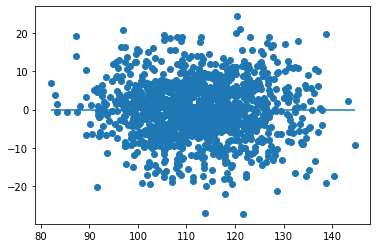

In [185]:
predictions = model.predict(x_test)
# Plot Residuals
plt.scatter(predictions, predictions - y_test)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [218]:
pd_linear_test = pd.DataFrame({"Predicted": predictions, "Actual": y_test, "Error": predictions - y_test})[["Predicted", "Actual", "Error"]]
pd_linear_test["Team"] = df_games_linear_Test["HOME_TEAM_NAME"]

In [219]:
pd_linear_test = pd_linear_test.reset_index()
pd_linear_test.head()

,game #,Predicted,Actual,Error,Team
0,0,103.314428,93.0,10.314428,Heat
1,1,111.313863,108.0,3.313863,Lakers
2,2,102.741833,96.0,6.741833,Heat
3,3,118.263798,115.0,3.263798,Heat
4,4,114.481099,124.0,-9.518901,Lakers


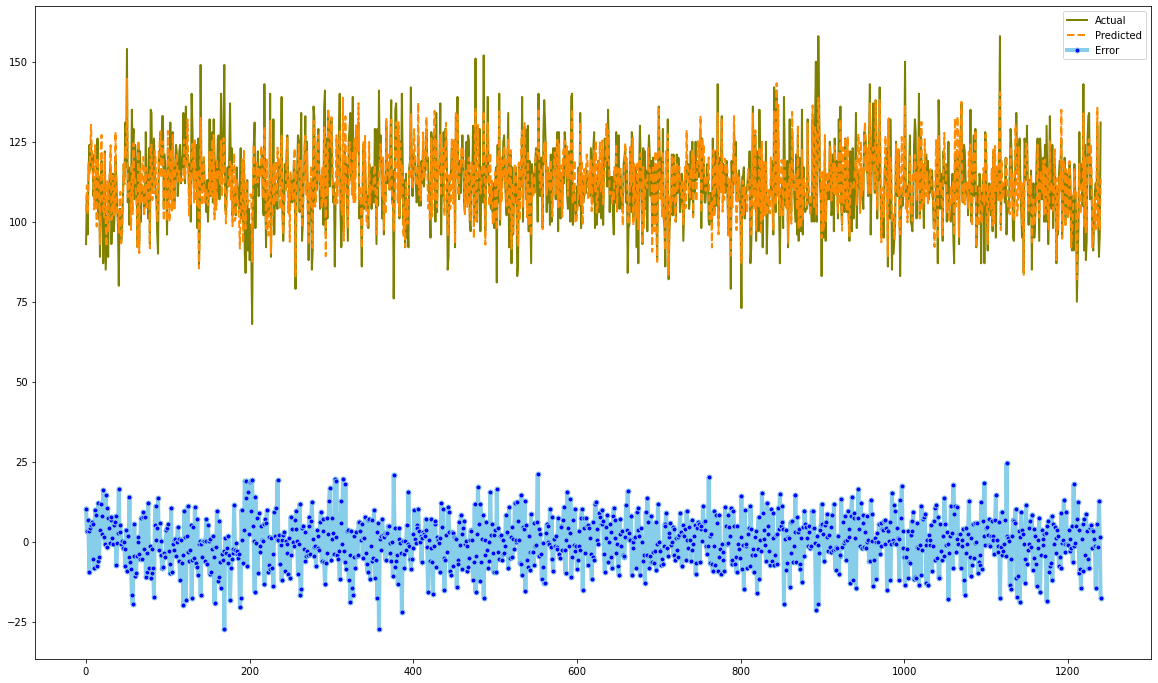

In [213]:
# multiple line plots
plt.rcParams["figure.figsize"] = (20,12)
plt.plot( 'game #', 'Actual', data=pd_linear_test, marker='', color='olive', linewidth=2)
plt.plot( 'game #', 'Predicted', data=pd_linear_test, marker='', color='darkorange', linewidth=2, linestyle='dashed', label="Predicted")
plt.plot( 'game #', 'Error', data=pd_linear_test, marker='o', markerfacecolor='blue', markersize=5, color='skyblue', linewidth=4)
# show legend
plt.legend()

# show graph
plt.show()

In [220]:
# test --> prediction sum points vs. actual sum points
pd_linear_test_1 = pd_linear_test.groupby(['Team'],as_index=False)[['Predicted','Actual']].sum()

In [224]:
pd_linear_test_1 = pd_linear_test_1.sort_values(by = 'Predicted', ascending=False)
pd_linear_test_1.head(10)

,Team,Predicted,Actual
13,Lakers,5982.349010,5916.0
8,Heat,5905.524652,5841.0
17,Nuggets,5595.060665,5409.0
4,Celtics,5448.922371,5504.0
5,Clippers,5428.589445,5507.0
1,Bucks,5246.518418,5363.0
21,Raptors,5205.387882,5177.0
15,Mavericks,4959.202544,5156.0
18,Pacers,4922.896806,4744.0
22,Rockets,4905.149658,5265.0


In [243]:
# Top 3 teams that has won the most championships: Boston Celtics, LA Lakers, Chicago Bulls (from Google)
# Boston Celtics, LA Lakers, Chicago Bulls, Miami Heat -- Teams I will study with 

# Now lets look at these 'top 4' teams performance

pd_spider = df_games_linear
pd_spider = pd_spider.groupby(['HOME_TEAM_NAME'],as_index=False)[['FG_PCT_home','FT_PCT_home','FG3_PCT_home','AST_home','REB_home']].mean()
pd_spider['AST_home'] = pd_spider['AST_home'] / 100
pd_spider['REB_home'] = pd_spider['REB_home'] / 100
pd_spider.head()

,HOME_TEAM_NAME,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home
0,76ers,0.474403,0.769439,0.365187,0.272014,0.480504
1,Bucks,0.481127,0.757007,0.359859,0.255070,0.473099
2,Bulls,0.444128,0.766016,0.351488,0.236080,0.437840
3,Cavaliers,0.462618,0.773919,0.361206,0.226838,0.434265
4,Celtics,0.462349,0.791953,0.366121,0.247718,0.454497


In [244]:
searchfor = ['Heat', 'Bulls','Celtics','Lakers']
pd_spider = pd_spider[pd_spider.HOME_TEAM_NAME.str.contains('|'.join(searchfor))]
pd_spider

,HOME_TEAM_NAME,FG_PCT_home,FT_PCT_home,FG3_PCT_home,AST_home,REB_home
2,Bulls,0.444128,0.766016,0.351488,0.236080,0.437840
4,Celtics,0.462349,0.791953,0.366121,0.247718,0.454497
8,Heat,0.464142,0.743496,0.367099,0.243546,0.448227
13,Lakers,0.470444,0.726104,0.333299,0.255139,0.468194


In [262]:
pd_spider.iloc[0]['HOME_TEAM_NAME']

'Bulls'

In [245]:
from math import pi

In [254]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [267]:
categories = ['FG_PCT_home','FT_PCT_home','FG3_PCT_home',
              'AST_home', 'REB_home']

fig = go.Figure()
for i in range(0, 4):
    fig.add_trace(go.Scatterpolar(
      r=[pd_spider.iloc[i]['FG_PCT_home'], pd_spider.iloc[i]['FT_PCT_home'], pd_spider.iloc[i]['FG3_PCT_home'],
         pd_spider.iloc[i]['AST_home'], pd_spider.iloc[i]['REB_home']],
      theta=categories,
      fill='toself',
      name=pd_spider.iloc[i]['HOME_TEAM_NAME']))
    
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 0.8]
    )),
  #showlegend=False,
    title_text="'Top 4' NBA Teams"
)

fig.show()

Overall, it is hard to predict the best team / winning team of the NBA game. There are many other factors that could affact the game, player's injury, swiching teams, players mood, or even luck etc. I had fun and enjoyed a lot working on this project.
GOOOOOO HEAT!